In [2]:
import pandas as pd
from glob import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
if os.name == 'posix':
    plt.rc("font", family = "AppleGothic")
else:
    plt.rc("font", family = "Malgun Gothic")

In [43]:
now = os.getcwd()
country_codes = ['GR', 'NL', 'NO', 'NZ', 'TW', 'KR', 'DK', 'DE', 'LV', 'LU', 'LT', 'MO', 'MT', 'US', 'BE',
                 'SM', 'SE', 'CH', 'ES', 'SK', 'SI', 'SG', 'IS', 'IE', 'AD', 'EE', 'GB', 'AT', 'IL', 'IT',
                'JP', 'CZ', 'CA', 'HR', 'CY', 'PT', 'PR', 'FR', 'FI', 'AU', 'HK' ]

df = pd.read_csv('Holiday_data/holiday_data.csv')


In [44]:
National_holiday = df[(df['Country Code'] == 'GR') & (df['Type'].str.contains('National holiday'))]
                                                    
for code in country_codes[1:]:
    loc = df[(df['Country Code'] == code) & (df['Type'].str.contains('National holiday'))]                                            
    National_holiday = pd.concat([National_holiday, loc])

# 전체 국가들의 휴일 중에서 선진국이면서 공휴일인 날 들을 모두 모은다.

In [45]:
National_holiday

,Unnamed: 0,Date,Name,Type,Country Name,Country Code,{
281,0,2023-01-01,New Year's Day,['National holiday'],Greece,GR,NaN
282,1,2023-01-06,Epiphany,['National holiday'],Greece,GR,NaN
285,4,2023-02-27,Clean Monday,['National holiday'],Greece,GR,NaN
287,6,2023-03-25,Greek Independence Day,['National holiday'],Greece,GR,NaN
288,7,2023-03-25,Annunciation of the Virgin Mary,['National holiday'],Greece,GR,NaN
...,...,...,...,...,...,...,...
5506,25,2023-10-01,National Day of the People's Republic of China,['National holiday'],Hong Kong,HK,NaN
5507,26,2023-10-02,National Day of the People's Republic of China...,['National holiday'],Hong Kong,HK,NaN
5508,27,2023-10-23,Chung Yeung Festival,['National holiday'],Hong Kong,HK,NaN
5511,30,2023-12-25,Christmas Day,['National holiday'],Hong Kong,HK,NaN


<Axes: xlabel='나라명', ylabel='공휴일 수'>

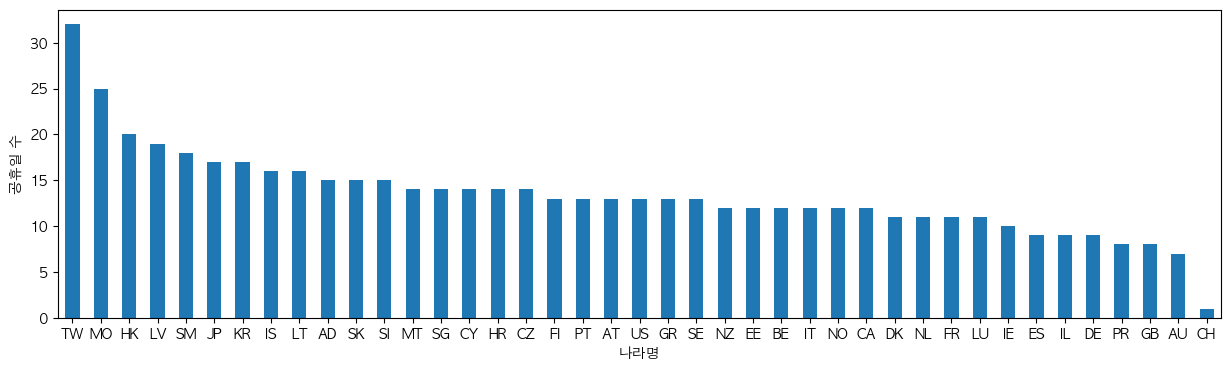

In [46]:
plt.figure(figsize = (15, 4))
n = National_holiday['Country Code'].value_counts()
n.plot.bar(rot = 0, xlabel = '나라명', ylabel = '공휴일 수')
# 전체 선진국들의 공휴일의 수 차트


In [48]:
df_oecd = pd.read_csv(glob('OECE_worktime_data/DP_*')[0])
# oecd의 년 근로시간

In [49]:
df_work_time = df_oecd[df_oecd['TIME'] == 2022]

<Axes: xlabel='나라명', ylabel='연 평균 근로시간'>

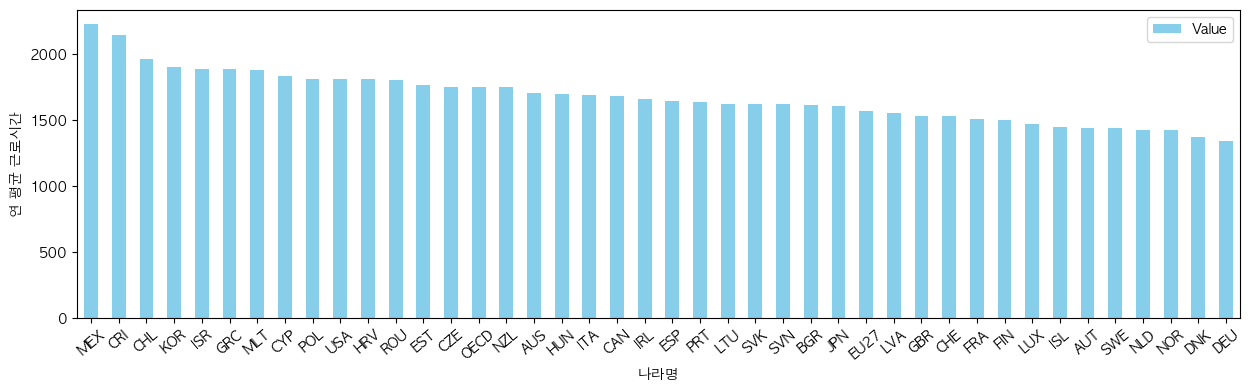

In [50]:
df_work_time = df_work_time.sort_values(by = 'Value', ascending = False)
df_work_time.plot.bar(color = 'skyblue', rot = 40, x = 'LOCATION', y = 'Value',
                      ylabel = '연 평균 근로시간', xlabel = '나라명', figsize = (15,4))


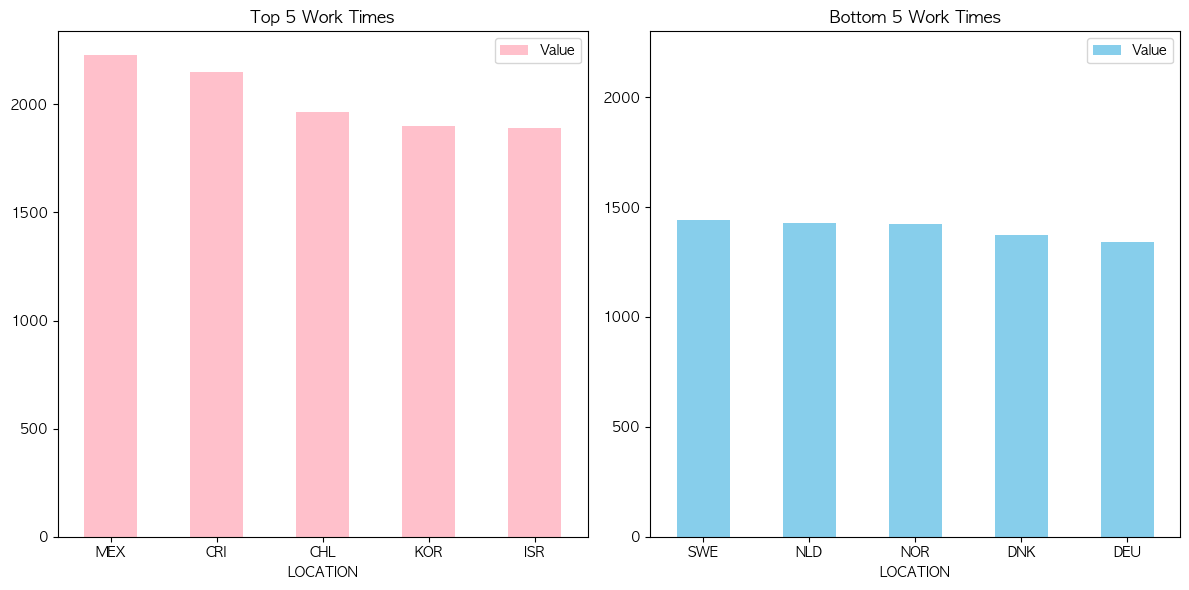

In [51]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

df_top5 = df_work_time.sort_values(by = 'Value', ascending = False).head(5)
df_bottom5 = df_work_time.sort_values(by = 'Value', ascending = False).tail(5)

df_top5.plot.bar(rot = 0, x = "LOCATION", y = 'Value', ax = axes[0], color = ['pink'])
axes[0].set_title('Top 5 Work Times')

df_bottom5.plot.bar(rot = 0, x = "LOCATION", y = 'Value', ax = axes[1], color = 'skyblue')
axes[1].set_title('Bottom 5 Work Times')
axes[1].set_ylim(0,2300)
plt.tight_layout()

plt.show()


In [52]:
happiness_top5 = {'MEX' : 46, 'CRI' : 23, 'CHL' : 44, 'KOR' : 59, 'ISR' : 3}
happiness_bottom5 = {'SWE' : 7, 'NLD' : 5, 'NCR' : 8, 'DNK' : 2, 'DEU' : 14}
# SDSN : Sustainable Development Solutions Network 행복지수 2021

In [56]:
df_SDSN = pd.read_excel(glob('SDSN_data/*')[0])

In [57]:
df_SDSN['Country name']
holiday_count = National_holiday.groupby(['Country Name'])['Country Name'].count()

In [58]:
print(df_SDSN.columns)
df_SDSN.sample(5)


Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
113,Chad,4.3966,0.120609,4.632994,4.160205,7.261129,0.722042,53.125000,0.676735,0.221162,0.806712,1.777825,0.622040,0.961660,0.043453,0.392688,0.255095,0.087655,2.034056
111,Sri Lanka,4.4416,0.082592,4.603479,4.279720,9.491008,0.825963,67.149902,0.786556,-0.029988,0.808491,1.777825,1.421780,1.224168,0.425585,0.538830,0.120341,0.086381,0.624548
20,France,6.6613,0.037606,6.735007,6.587593,10.700735,0.908804,72.300056,0.818730,-0.100290,0.552619,1.777825,1.855645,1.433425,0.565909,0.581645,0.082621,0.269654,1.872446
90,Guinea,5.0717,0.071926,5.212676,4.930725,7.880492,0.648633,54.185394,0.658715,0.125201,0.786969,1.777825,0.844172,0.776227,0.072345,0.368709,0.203607,0.101796,2.704875
58,Mauritius,5.9023,0.056597,6.013229,5.791370,9.957201,0.888333,63.850124,0.812943,-0.028225,0.774906,1.777825,1.588978,1.381716,0.335677,0.573943,0.121287,0.110437,1.790236


In [59]:
df_oecd[df_oecd['TIME'] == 2022]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
37,AUS,HRWKD,TOT,HR_WKD,A,2022,1707.325609,NaN
65,AUT,HRWKD,TOT,HR_WKD,A,2022,1443.720369,NaN
179,CAN,HRWKD,TOT,HR_WKD,A,2022,1686.000000,NaN
209,CZE,HRWKD,TOT,HR_WKD,A,2022,1754.050330,NaN
262,DNK,HRWKD,TOT,HR_WKD,A,2022,1371.606096,NaN
325,FIN,HRWKD,TOT,HR_WKD,A,2022,1498.068704,NaN
398,FRA,HRWKD,TOT,HR_WKD,A,2022,1511.400222,NaN
451,DEU,HRWKD,TOT,HR_WKD,A,2022,1340.861971,NaN
491,GRC,HRWKD,TOT,HR_WKD,A,2022,1886.293958,NaN
534,HUN,HRWKD,TOT,HR_WKD,A,2022,1699.600000,NaN


In [60]:
len(df_work_time)

42

In [61]:
country_mapping = {'Finland': 'FIN','Denmark': 'DNK','Iceland': 'ISL','Israel': 'ISR',
                   'Netherlands': 'NLD','Sweden': 'SWE','Norway': 'NOR','Switzerland': 'CHE',
                   'Luxembourg': 'LUX','New Zealand': 'NZL','Austria': 'AUT','Australia': 'AUS',
                   'Canada': 'CAN','Ireland': 'IRL','United States': 'USA','Germany': 'DEU',
                   'Belgium': 'BEL','Czechia': 'CZE','United Kingdom': 'GBR','Lithuania': 'LTU',
                   'France': 'FRA','Slovenia': 'SVN','Singapore': 'SGP','Slovakia': 'SVK',
                   'Estonia': 'EST','Spain': 'ESP','Italy': 'ITA','Malta': 'MLT','Latvia': 'LVA',
                   'Cyprus': 'CYP','Japan': 'JPN','Croatia': 'HRV','Portugal': 'PRT',
                   'South Korea': 'KOR',  'Greece': 'GRC'
                    }

# df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x = "경도", y = "위도", figsize = (8,7),grid = True)
name = []
rank = []
work = []
NH_count = []
C_code = []
for i in range(len(df_SDSN)):
    try:
        code = country_mapping[df_SDSN['Country name'][i]]
        work.append(round(df_work_time[df_work_time['LOCATION'] == code]['Value'].values[0],2)) # 연 근로시간
        NH_count.append(holiday_count[df_SDSN['Country name'][i]]) # 휴일 수
        name.append(df_SDSN['Country name'][i])                    # 나라명
        rank.append(i+1)                                           # 행복지수 순위
        C_code.append(country_mapping[df_SDSN['Country name'][i]]) # 국가 코드

    except Exception as e:
        continue

# SDSN의 행복지수와 OECD의 근로시간, 나라별 휴일 수 데이터를 선진국들만 포함하여 새로 작성.

In [62]:
data = {"국가 이름" : name, "행복지수 순위" : rank, "휴일 수" : NH_count, "연 근로시간" : work, "국가 코드" : C_code}
df_all = pd.DataFrame(data)
df_all.describe()

,행복지수 순위,휴일 수,연 근로시간
count,33.000000,33.000000,33.000000
mean,22.757576,12.303030,1629.759697
std,17.462514,3.377174,164.158498
min,1.000000,1.000000,1340.860000
25%,9.000000,11.000000,1498.070000
50%,18.000000,13.000000,1624.160000
75%,33.000000,14.000000,1754.050000
max,58.000000,19.000000,1901.000000


In [63]:
df_all.sort_values(by = '행복지수 순위',)

,국가 이름,행복지수 순위,휴일 수,연 근로시간,국가 코드
0,Finland,1,13,1498.07,FIN
1,Denmark,2,11,1371.61,DNK
2,Iceland,3,16,1449.22,ISL
3,Israel,4,9,1891.90,ISR
4,Netherlands,5,11,1427.02,NLD
5,Sweden,6,13,1440.46,SWE
6,Norway,7,12,1424.58,NOR
7,Switzerland,8,1,1528.66,CHE
8,Luxembourg,9,11,1473.26,LUX
9,New Zealand,10,12,1748.00,NZL


<Axes: title={'center': '행복지수 순위와 연 근로시간의 scatterplot'}, xlabel='행복지수 순위', ylabel='연 근로시간'>

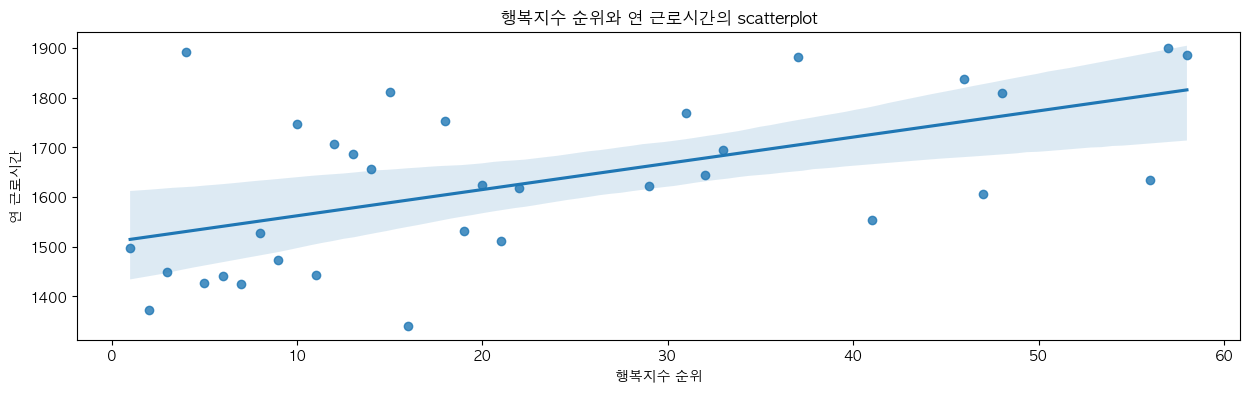

In [64]:
# df_all[['행복지수 순위','연 근로시간','국가 이름']].plot.scatter(x = '행복지수 순위', y = '연 근로시간', color = 'green')
plt.title('행복지수 순위와 연 근로시간의 scatterplot')
sns.regplot(x = '행복지수 순위', y = '연 근로시간', data = df_all)

<Axes: xlabel='국가 코드'>

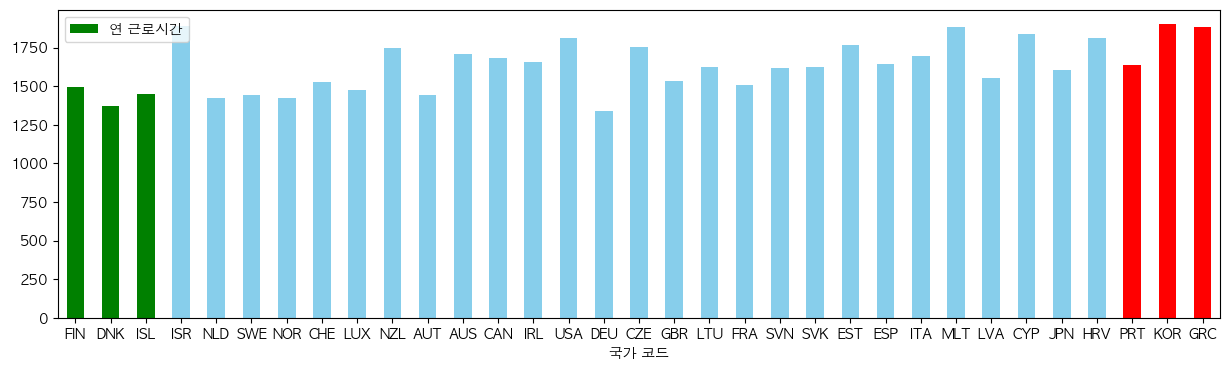

In [65]:
colors = []
b_count = [0,1,2]
r_count = [30,31,32]
for i in range(len(df_all)):
    if i in b_count:
        colors.append('green')
    elif i in r_count:
        colors.append('red')
    else:
        colors.append('skyblue')
        
plt.rcParams["figure.figsize"] = (15,4)
df_all[['국가 코드', '행복지수 순위','연 근로시간']].sort_values(by = '행복지수 순위').plot.bar(x = '국가 코드',  y = '연 근로시간',
                                                                           color = colors, rot = 0)

# 왼쪽부터 행복지수 순위가 높은 순으로 정렬한 국가별 근로시간 그래프

          행복지수 순위    연 근로시간      휴일 수
행복지수 순위  1.000000  0.562134  0.436858
연 근로시간   0.562134  1.000000  0.180810
휴일 수     0.436858  0.180810  1.000000


<Axes: >

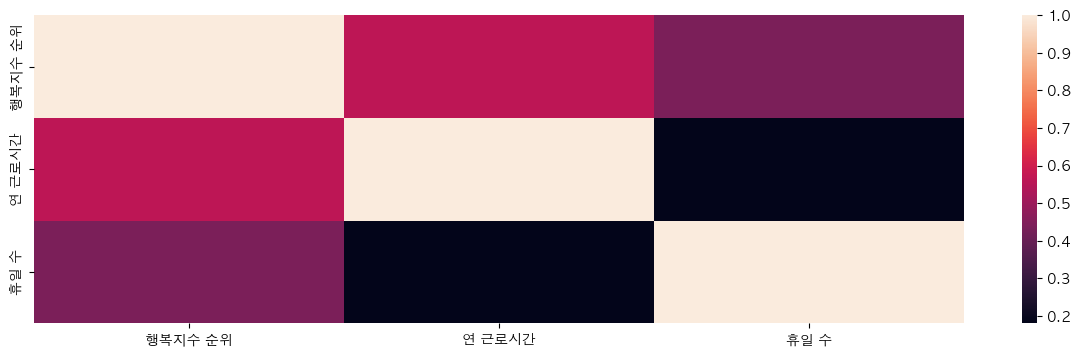

In [66]:

df_corr_p = df_all[['행복지수 순위','연 근로시간','휴일 수']].corr(method = 'pearson') # 두 변수 사이의 '선형 관계'의 강도와 방향
print(df_corr_p)
sns.heatmap(df_corr_p)


          행복지수 순위    연 근로시간      휴일 수
행복지수 순위  1.000000  0.401515  0.302346
연 근로시간   0.401515  1.000000  0.140304
휴일 수     0.302346  0.140304  1.000000 



<Axes: >

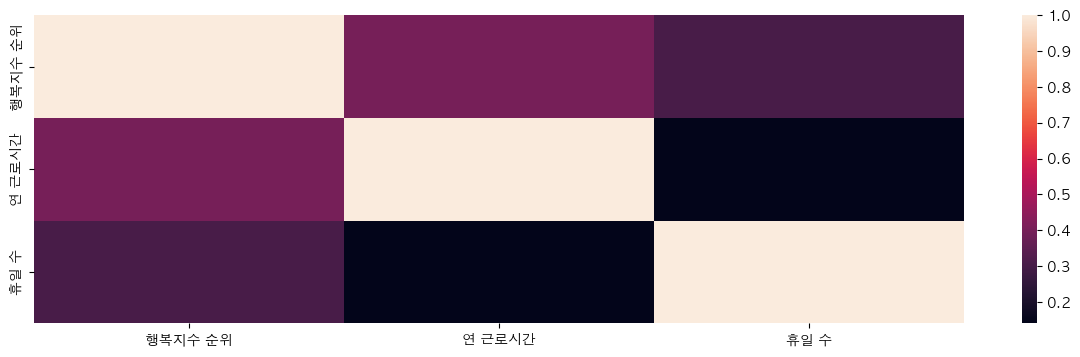

In [67]:

df_corr_k = df_all[['행복지수 순위','연 근로시간', '휴일 수']].corr(method='kendall') # 두 변수가 정규 분포를 벗어나는 경우/순위 척도
print(df_corr_k,'\n')
sns.heatmap(df_corr_k)

          행복지수 순위    연 근로시간      휴일 수
행복지수 순위  1.000000  0.401515  0.302346
연 근로시간   0.401515  1.000000  0.140304
휴일 수     0.302346  0.140304  1.000000 



<Axes: >

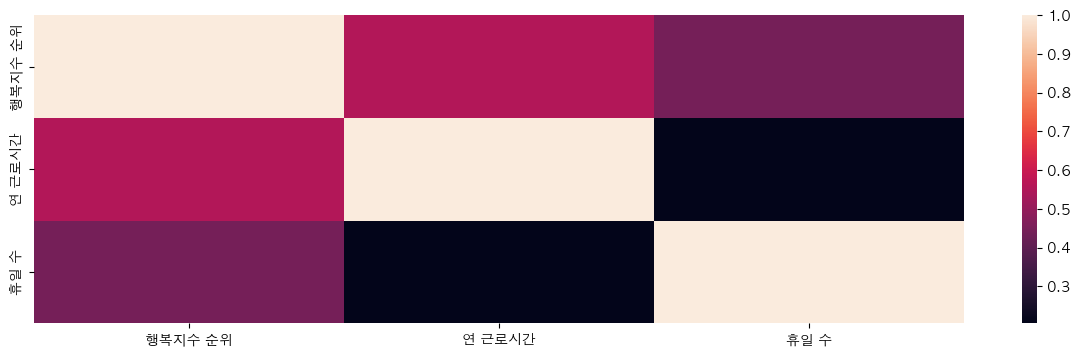

In [68]:

df_corr_s = df_all[['행복지수 순위','연 근로시간', '휴일 수']].corr(method='spearman') # 두 변수의 순위 관계에 대해서 사용
print(df_corr_k,'\n')
sns.heatmap(df_corr_s)

In [69]:
from scipy import stats
 
# print(stats.ttest_ind(df_all['행복지수 순위'], df_all['연 근로시간'] ),'\n') 
# t-검정은 알 수 없는 두 그룹 모집단 평균이 같은지 여부를 검정하는 데 사용되는 방법이다.
print('--행복지수 순위와 연 근로시간 간의 스피어맨 상관계수--')
print(stats.spearmanr(df_all['행복지수 순위'], df_all['연 근로시간'] ), '\n')
print('--행복지수 순위와 휴일 간의 스피어맨 상관계수--')
print(stats.spearmanr(df_all['행복지수 순위'], df_all['휴일 수'] ), '\n')
print('--행복지수 순위와 연 근로시간 간의 켄달 타우 상관계수--')
print(stats.kendalltau(df_all['행복지수 순위'], df_all['연 근로시간'] ), '\n')
print('--행복지수 순위와 휴일 수 간의 켄달 타우 상관계수--')
print(stats.kendalltau(df_all['행복지수 순위'], df_all['휴일 수'] ), '\n')


--행복지수 순위와 연 근로시간 간의 스피어맨 상관계수--
SignificanceResult(statistic=0.554144385026738, pvalue=0.0008199316576865252) 

--행복지수 순위와 휴일 간의 스피어맨 상관계수--
SignificanceResult(statistic=0.44120181701880673, pvalue=0.010164894651549053) 

--행복지수 순위와 연 근로시간 간의 켄달 타우 상관계수--
SignificanceResult(statistic=0.40151515151515155, pvalue=0.0008217398680352673) 

--행복지수 순위와 휴일 수 간의 켄달 타우 상관계수--
SignificanceResult(statistic=0.3023455634494775, pvalue=0.016824178548506787) 

